In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from pylab import rcParams
import pandas as pd
import datetime

In [3]:
plt.rcParams['figure.figsize'] = 10,12

plt.style.use('seaborn-whitegrid')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
transaction = pd.read_excel(r'KPMG_Transaction.xlsx', sheet_name='Transactions')
customer_address = pd.read_excel(r'KPMG_Customer_Address.xlsx', sheet_name='CustomerAddress')
customer_demographic = pd.read_excel(r'KPMG_Customer_Demographic.xlsx', sheet_name='CustomerDemographic')
new_list = pd.read_excel(r'KPMG_new_Customer_list.xlsx', sheet_name='NewCustomerList')

# DATA EXPLORATION

In [6]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,140,11,462,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,2016-07-09 00:00:00
1,517,77,311,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,2011-05-09 00:00:00
2,561,65,2298,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,2010-08-20 00:00:00
3,1293,67,1931,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22 00:00:00
4,1403,0,2891,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,1993-07-20 00:00:00


In [7]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 2.0+ MB


In [8]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,66,Anselm,Gawne,Male,46,2002-03-11,18.412055,Account Executive,Argiculture,High Net Worth,N,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,18.532603,Food Chemist,Health,Mass Customer,N,Yes,1.0
3,3435,Stevena,Allcock,Female,80,2002-01-15,18.562740,Senior Editor,NaN,Affluent Customer,N,No,1.0
4,2858,Benedicto,Radki,Male,4,2002-01-09,18.579178,Recruiting Manager,NaN,Mass Customer,N,Yes,1.0


In [9]:
customer_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

# Filtering the data



In [10]:
customer_demographic.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null bool
first_name                             4000 non-null bool
last_name                              4000 non-null bool
gender                                 4000 non-null bool
past_3_years_bike_related_purchases    4000 non-null bool
DOB                                    4000 non-null bool
Age                                    4000 non-null bool
job_title                              4000 non-null bool
job_industry_category                  4000 non-null bool
wealth_segment                         4000 non-null bool
deceased_indicator                     4000 non-null bool
owns_car                               4000 non-null bool
tenure                                 4000 non-null bool
dtypes: bool(13)
memory usage: 50.9 KB


In [11]:
customer_demographic.isnull()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,False,False,False,False,False,True,True,True,False,False,False,False,True
3996,False,False,False,False,False,True,True,False,False,False,False,False,True
3997,False,False,False,False,False,True,True,True,False,False,False,False,True
3998,False,False,False,False,False,True,True,True,False,False,False,False,True


In [12]:
customer_demographic.dropna(subset=['DOB'], inplace=True)

In [13]:
customer_demographic.dropna(subset=['Age'], inplace=True)

In [14]:
customer_demographic.dropna(subset=['job_title'], inplace=True)

In [15]:
customer_demographic.dropna(subset=['job_industry_category'], inplace=True)

In [16]:
customer_demographic.dropna(subset=['tenure'], inplace=True)

In [17]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,66,Anselm,Gawne,Male,46,2002-03-11,18.412055,Account Executive,Argiculture,High Net Worth,N,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,18.532603,Food Chemist,Health,Mass Customer,N,Yes,1.0
6,2296,Nathalia,Sanger,Female,16,2002-01-01,18.601096,Geologist IV,Retail,Affluent Customer,N,No,1.0
7,470,Darbee,Klimowicz,Male,22,2001-12-19,18.636712,Internal Auditor,Retail,Mass Customer,N,No,1.0
8,3949,Costa,Sleightholm,Male,24,2001-12-19,18.636712,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0


Text(0.5, 0, 'Age')

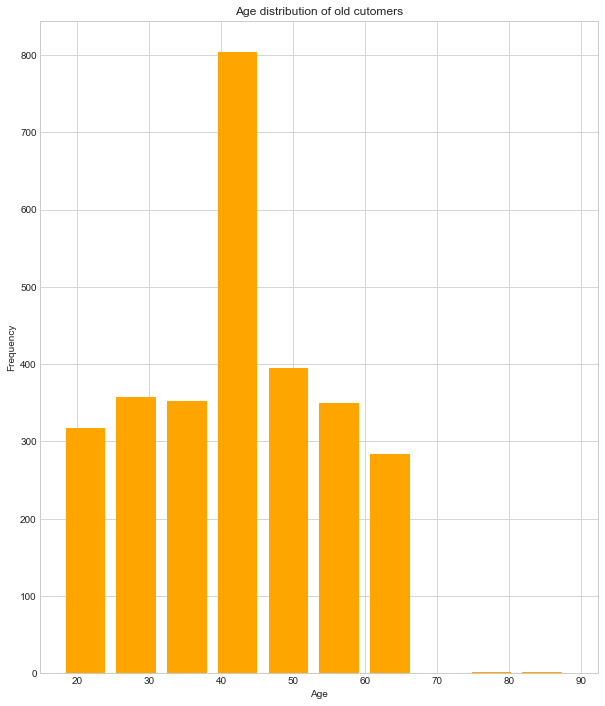

In [18]:
customer_demographic['Age'].plot.hist(title='Age distribution of old cutomers', color='Orange', width=5.5)
plt.xlabel('Age')


In [19]:
new_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Today Date,Age,job_title,job_industry_category,wealth_segment,...,postcode,state,country,property_valuation,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value
0,Giulietta,Garbott,Female,59,2002-02-27,2020 - 08 - 04,18.0,Technical Writer,NaN,Affluent Customer,...,3810,VIC,Australia,5,0.71,0.8875,0.8875,0.887500,237,0.984375
1,Lura,Fawdrie,Female,66,2002-01-17,2020 - 08 - 04,18.0,VP Sales,Health,Mass Customer,...,4211,QLD,Australia,3,1.01,1.2625,1.2625,1.073125,247,0.937500
2,Simmonds,Bapty,Male,52,2002-01-04,2020 - 08 - 04,18.0,Junior Executive,Financial Services,Affluent Customer,...,2025,NSW,Australia,12,0.70,0.7000,0.8750,0.875000,178,0.637500
3,Tomkin,Bernlin,Male,7,2001-12-29,2020 - 08 - 04,18.0,Food Chemist,Health,Affluent Customer,...,2480,NSW,Australia,3,0.76,0.9500,0.9500,0.950000,263,0.881875
4,Burk,Wortley,Male,22,2001-10-17,2020 - 08 - 04,18.0,Senior Sales Associate,Health,Mass Customer,...,2196,NSW,Australia,10,0.43,0.4300,0.5375,0.456875,8,0.357000


In [20]:
new_list.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
first_name                             1000 non-null bool
last_name                              1000 non-null bool
gender                                 1000 non-null bool
past_3_years_bike_related_purchases    1000 non-null bool
DOB                                    1000 non-null bool
Today Date                             1000 non-null bool
Age                                    1000 non-null bool
job_title                              1000 non-null bool
job_industry_category                  1000 non-null bool
wealth_segment                         1000 non-null bool
deceased_indicator                     1000 non-null bool
owns_car                               1000 non-null bool
tenure                                 1000 non-null bool
address                                1000 non-null bool
postcode                               1000 non-null bool
state                   

In [21]:
new_list['DOB'].isnull().values.any()

True

In [22]:
new_list.dropna(subset=['DOB'], inplace=True)

In [23]:
new_list['job_title'].isnull().values.any()

True

In [24]:
new_list.dropna(subset=['job_title'], inplace=True)

In [25]:
new_list['Age'].isnull().values.any()

False

Text(0.5, 0, 'Age')

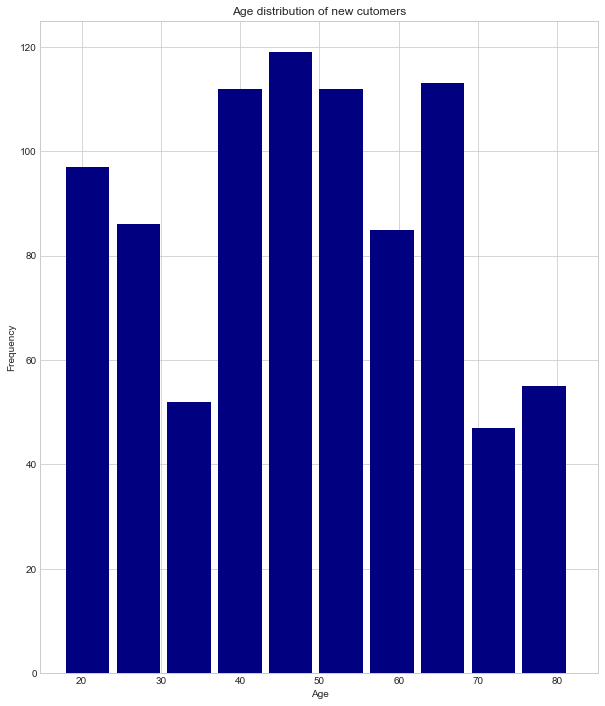

In [26]:
new_list['Age'].plot.hist(title='Age distribution of new cutomers',color='Navy',width=5.5)
plt.xlabel('Age')

In [27]:
group = new_list.groupby('gender').agg({'past_3_years_bike_related_purchases': ['count']})
group

,past_3_years_bike_related_purchases
,count
gender,
Female,453
Male,425


In [28]:
group_by = customer_demographic.groupby('gender').agg({'past_3_years_bike_related_purchases': ['count']})
group_by

,past_3_years_bike_related_purchases
,count
gender,
Female,1483
Male,1381


Text(0.5, 1.0, 'Past_3_years_bike_related_purchases of old Customer')

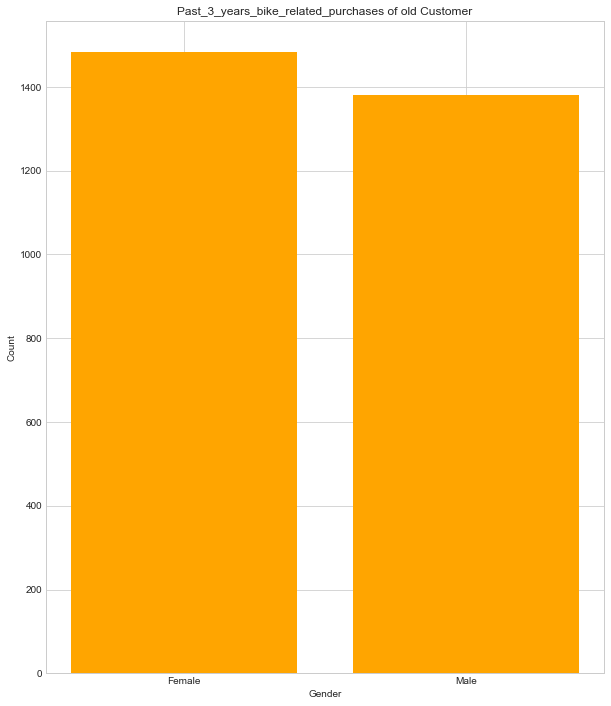

In [29]:
y = [1483, 1381]
x = ['Female', 'Male']
plt.bar(x,y, color='Orange')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Past_3_years_bike_related_purchases of old Customer')

Text(0.5, 1.0, 'Past_3_years_bike_related_purchases of New Customer')

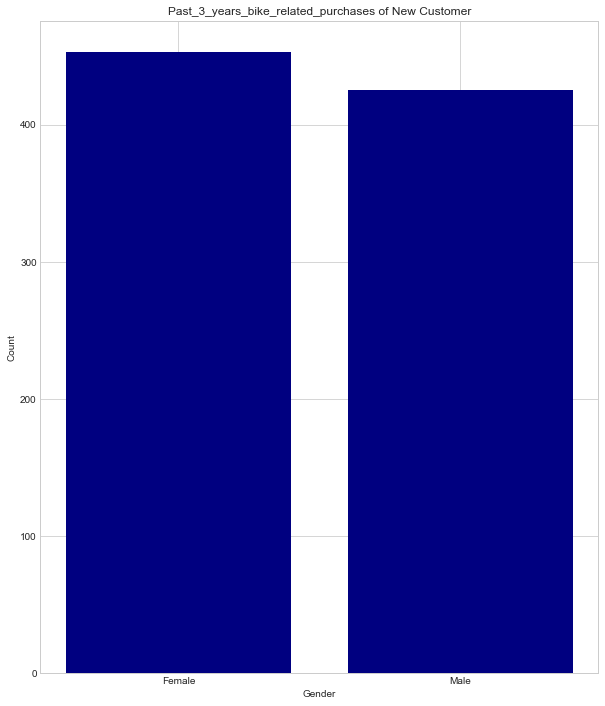

In [30]:
y1 = [453, 425]
x1 = ['Female', 'Male']
plt.bar(x1,y1, color='Navy', width=0.8)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Past_3_years_bike_related_purchases of New Customer')    

In [31]:
group_by_n = customer_demographic.groupby('job_industry_category').agg({'customer_id': ['count']})
group_by_n

,customer_id
,count
job_industry_category,
Argiculture,99
Entertainment,122
Financial Services,682
Health,543
IT,126
Manufacturing,695
Property,231
Retail,305


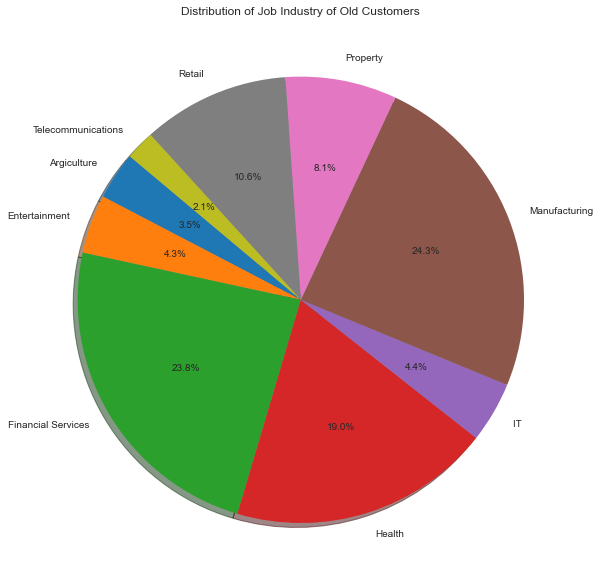

In [32]:
z = [99,122,682,543,126,695,231,305,61]
label_type = ['Argiculture','Entertainment','Financial Services','Health','IT ','Manufacturing','Property','Retail','Telecommunications']
plt.title('Distribution of Job Industry of Old Customers')
plt.pie(z, labels = label_type, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [33]:
group_by_n_1 = new_list.groupby('job_industry_category').agg({'first_name': ['count']})
group_by_n_1

,first_name
,count
job_industry_category,
Argiculture,24
Entertainment,34
Financial Services,187
Health,138
IT,30
Manufacturing,175
Property,51
Retail,73


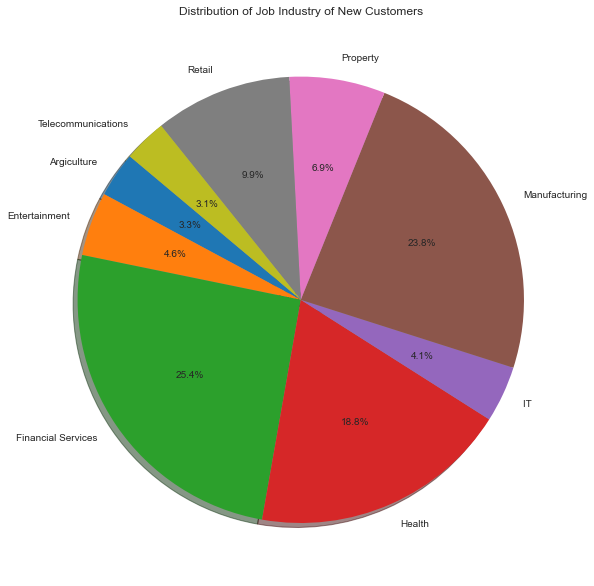

In [34]:
z = [24,34,187,138,30,175,51,73,23]
label_type = ['Argiculture','Entertainment','Financial Services','Health','IT ','Manufacturing','Property','Retail','Telecommunications']
plt.title('Distribution of Job Industry of New Customers')
plt.pie(z, labels = label_type, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [35]:
new = new_list.groupby(['owns_car','state']).size()
new

owns_car  state
No        NSW      235
          QLD       93
          VIC      120
Yes       NSW      203
          QLD      112
          VIC      115
dtype: int64

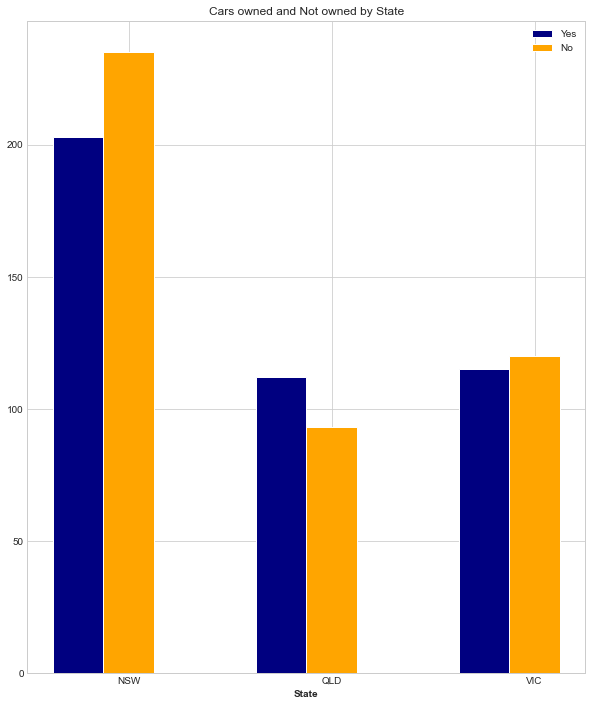

In [36]:
barWidth = 0.25
 
Yes = [203, 112, 115]
No = [235, 93, 120]

pos1 = np.arange(len(Yes))
pos2 = [x + barWidth for x in pos1]

plt.bar(pos1, Yes, color='Navy', width=barWidth, edgecolor='white', label='Yes')
plt.bar(pos2, No, color='Orange', width=barWidth, edgecolor='white', label='No')

plt.xlabel('State', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Yes))], ['NSW', 'QLD', 'VIC'])
plt.title('Cars owned and Not owned by State')
# Create legend & Show graphic
plt.legend()
plt.show()

In [37]:
#age categories
category = pd.cut(new_list.Age, bins=[0,19,39,59,99], 
                 labels=['Teen','Youngster','Middle Aged','Elderly'])
new_list.insert(8,'Age Group', category)



In [38]:
new_list.tail()    

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Today Date,Age,job_title,Age Group,job_industry_category,...,postcode,state,country,property_valuation,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value
995,Beverlee,Ungerechts,Female,49,1973-10-03 00:00:00,2020 - 08 - 04,46.0,Civil Engineer,Middle Aged,Manufacturing,...,4020,QLD,Australia,7,0.66,0.66,0.660,0.5610,5,0.754375
996,Ivy,Farr,Female,56,1973-07-03 00:00:00,2020 - 08 - 04,47.0,Office Assistant IV,Middle Aged,IT,...,2120,NSW,Australia,11,0.78,0.78,0.975,0.9750,3,0.828750
997,Brigitte,Whellams,Female,67,1973-05-09 00:00:00,2020 - 08 - 04,47.0,Payment Adjustment Coordinator,Middle Aged,NaN,...,2766,NSW,Australia,8,0.76,0.95,0.950,0.8075,1,1.156250
998,Olia,O' Mullan,Female,77,1973-03-24 00:00:00,2020 - 08 - 04,47.0,Account Executive,Middle Aged,Health,...,2263,NSW,Australia,7,0.69,0.69,0.690,0.5865,4,0.500000
999,Marinna,Kauschke,Female,21,1973-03-15 00:00:00,2020 - 08 - 04,47.0,Sales Associate,Middle Aged,Financial Services,...,3174,VIC,Australia,3,0.64,0.80,0.800,0.8000,1,0.775625


In [39]:
new = new_list.groupby(['Age Group','wealth_segment']).size()
new

Age Group    wealth_segment   
Teen         Affluent Customer      5
             Mass Customer          9
Youngster    Affluent Customer     58
             High Net Worth        72
             Mass Customer        122
Middle Aged  Affluent Customer     91
             High Net Worth        83
             Mass Customer        182
Elderly      Affluent Customer     61
             High Net Worth        68
             Mass Customer        127
dtype: int64

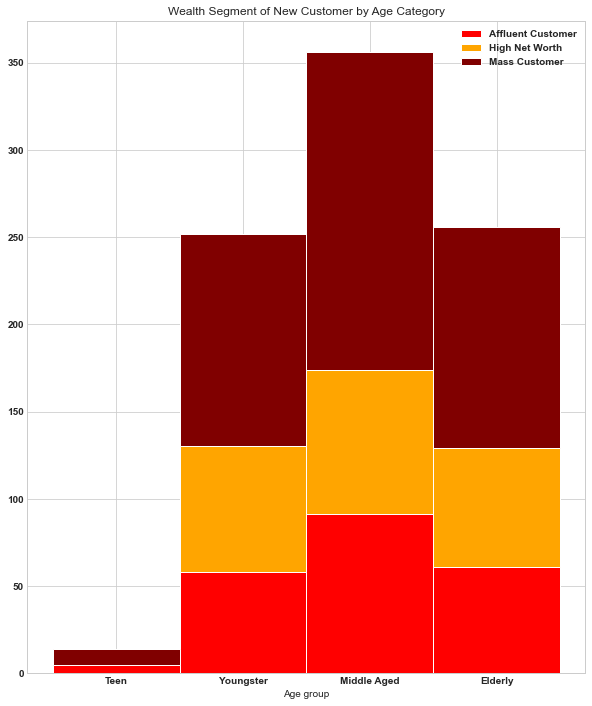

In [40]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', weight='bold')
A = [5, 58, 91, 61]
H = [0, 72, 83, 68]
M = [9, 122, 182, 127]
 

bars = np.add(A, H).tolist()
 

r = [0,1,2,3]
 
# Names of group and bar width
names = ['Teen','Youngster','Middle Aged','Elderly']
barWidth = 1

# Create brown bars
plt.bar(r, A, color='Red', edgecolor='white', width=barWidth, label="Affluent Customer")
# Create green bars (middle), on top of the firs ones
plt.bar(r, H, bottom=A, color='Orange', edgecolor='white', width=barWidth, label ='High Net Worth')
# Create green bars (top)
plt.bar(r, M, bottom=bars, color='Maroon', edgecolor='white', width=barWidth, label='Mass Customer')
plt.title('Wealth Segment of New Customer by Age Category')
plt.legend()
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Age group")
 
# Show graphic
plt.show()

In [41]:
category1 = pd.cut(customer_demographic.Age, bins=[0,19,39,59,99], 
                 labels=['Teen','Youngster','Middle Aged','Elderly'])
customer_demographic.insert(8,'Age Group', category1)

In [42]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,Age Group,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,66,Anselm,Gawne,Male,46,2002-03-11,18.412055,Account Executive,Teen,Argiculture,High Net Worth,N,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,18.532603,Food Chemist,Teen,Health,Mass Customer,N,Yes,1.0
6,2296,Nathalia,Sanger,Female,16,2002-01-01,18.601096,Geologist IV,Teen,Retail,Affluent Customer,N,No,1.0
7,470,Darbee,Klimowicz,Male,22,2001-12-19,18.636712,Internal Auditor,Teen,Retail,Mass Customer,N,No,1.0
8,3949,Costa,Sleightholm,Male,24,2001-12-19,18.636712,Web Designer IV,Teen,Manufacturing,High Net Worth,N,Yes,1.0


In [43]:
old = customer_demographic.groupby(['Age Group','wealth_segment']).size()
old

Age Group    wealth_segment   
Teen         Affluent Customer      5
             High Net Worth         3
             Mass Customer          8
Youngster    Affluent Customer    245
             High Net Worth       256
             Mass Customer        472
Middle Aged  Affluent Customer    365
             High Net Worth       388
             Mass Customer        761
Elderly      Affluent Customer     88
             High Net Worth        87
             Mass Customer        186
dtype: int64

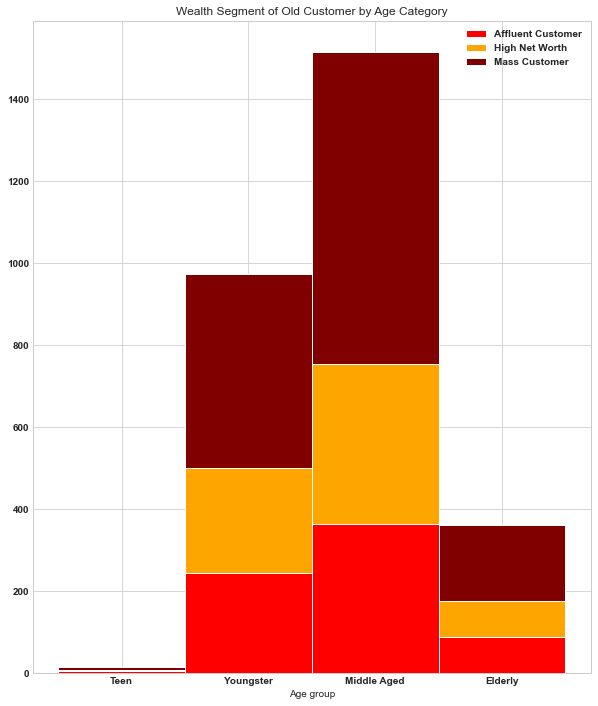

In [44]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', weight='bold')
A = [5, 245, 365, 88]
H = [3, 256, 388, 87]
M = [8, 472, 761, 186]
 

bars = np.add(A, H).tolist()
 

r = [0,1,2,3]
 
# Names of group and bar width
names = ['Teen','Youngster','Middle Aged','Elderly']
barWidth = 1

# Create brown bars
plt.bar(r, A, color='Red', edgecolor='white', width=barWidth, label="Affluent Customer")
# Create green bars (middle), on top of the firs ones
plt.bar(r, H, bottom=A, color='Orange', edgecolor='white', width=barWidth, label ='High Net Worth')
# Create green bars (top)
plt.bar(r, M, bottom=bars, color='Maroon', edgecolor='white', width=barWidth, label='Mass Customer')
plt.title('Wealth Segment of Old Customer by Age Category')
plt.legend()
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Age group")
 
# Show graphic
plt.show()

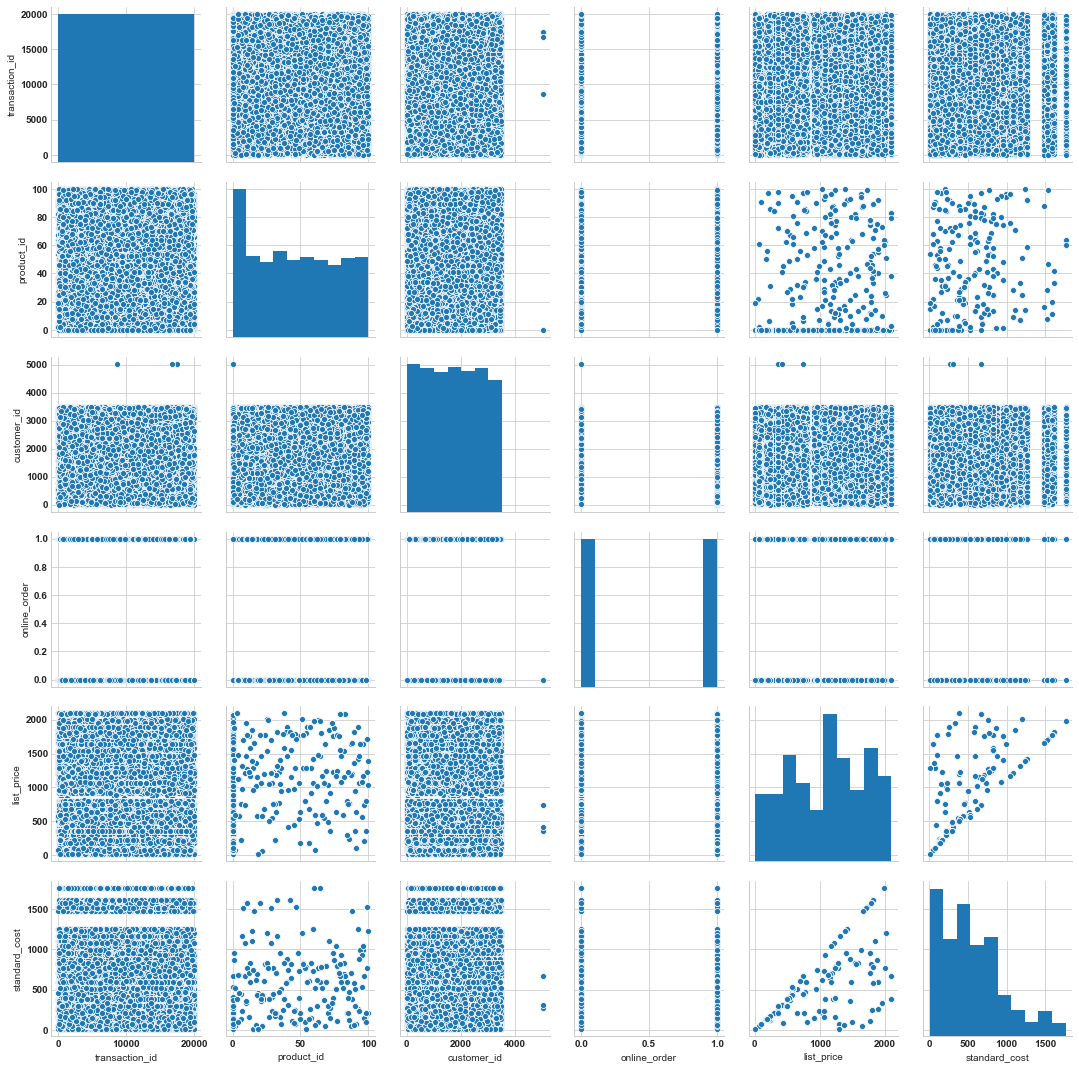

In [45]:
sb.pairplot(transaction)

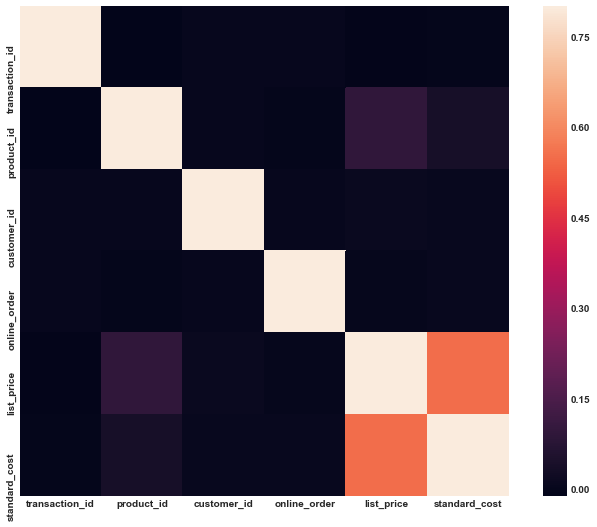

In [46]:
corrmat = transaction.corr()
fig = plt.figure(figsize = (12, 9))


sb.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [47]:
transaction.head(15)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,140,11,462,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,2016-07-09 00:00:00
1,517,77,311,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,2011-05-09 00:00:00
2,561,65,2298,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,2010-08-20 00:00:00
3,1293,67,1931,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22 00:00:00
4,1403,0,2891,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,1993-07-20 00:00:00
5,2008,38,722,2017-01-01,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2001-11-25 00:00:00
6,2276,22,2843,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,2016-02-04 00:00:00
7,2771,51,3470,2017-01-01,0.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2007-12-11 00:00:00
8,3318,24,2418,2017-01-01,1.0,Approved,Solex,Road,medium,large,1777.80,820.78,1999-06-23 00:00:00
9,3460,64,234,2017-01-01,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24 00:00:00


In [48]:
transaction.isnull().sum(axis=0)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# RFM Analysis

In [49]:
transaction['Profit'] = transaction['list_price'] - transaction['standard_cost']

In [50]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,140,11,462,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,2016-07-09 00:00:00,509.97
1,517,77,311,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,2011-05-09 00:00:00,1660.88
2,561,65,2298,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,2010-08-20 00:00:00,1028.76
3,1293,67,1931,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22 00:00:00,167.21
4,1403,0,2891,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,1993-07-20 00:00:00,45.96


In [51]:
date = transaction['transaction_date'].max()
date

Timestamp('2017-12-30 00:00:00')

In [52]:
import pandas as pd
from datetime import timedelta
import squarify
snap_date = transaction['transaction_date'].max() + timedelta(days = 1)
snap_date

Timestamp('2017-12-31 00:00:00')

In [53]:
process = transaction.groupby(['customer_id']).agg({
          'transaction_date': lambda x: (snap_date - x.max()).days,
          'transaction_id': 'count',
          'Profit': 'sum'})

In [54]:
process.rename(columns={'transaction_date': 'Recency',
                         'transaction_id': 'Frequency',
                         'Profit': 'MonetaryValue'}, inplace=True)
process.head()

,Recency,Frequency,MonetaryValue
customer_id,,,
1,8,11,3018.09
2,129,3,2226.26
3,103,8,3362.81
4,196,2,220.57
5,17,6,2394.94


# RFM Distribution

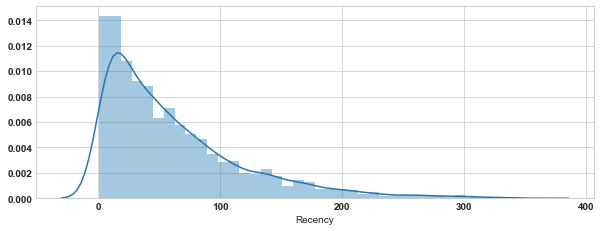

In [55]:
plt.subplot(3,1,1)
sb.distplot(process['Recency'])

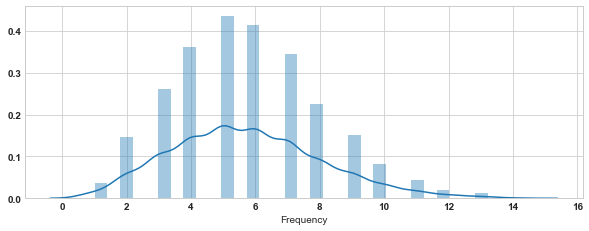

In [56]:
plt.subplot(3,1,2)
sb.distplot(process['Frequency'])

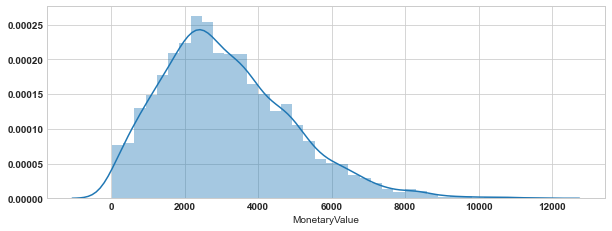

In [57]:
plt.subplot(3,1,3)
sb.distplot(process['MonetaryValue'])

In [58]:
#calculating the R & F groups
#creating the labels for them
R_labels = range(4,0,-1)
F_labels = range(1,5)

In [59]:
#these labels are now assigned to 4 equal percentile groups
R_groups = pd.qcut(process['Recency'], q=4, labels = R_labels)
F_groups = pd.qcut(process['Frequency'], q=4, labels = F_labels)

In [60]:
#adding column R and F
process = process.assign(R = R_groups.values, F = F_groups.values)
process.head()

,Recency,Frequency,MonetaryValue,R,F
customer_id,,,,,
1,8,11,3018.09,4,4
2,129,3,2226.26,1,1
3,103,8,3362.81,1,4
4,196,2,220.57,1,1
5,17,6,2394.94,4,2


In [61]:
M_labels = range(1,5)
M_groups = pd.qcut(process['MonetaryValue'], q=4, labels = M_labels)
process = process.assign(M = M_groups.values)
process.head()

,Recency,Frequency,MonetaryValue,R,F,M
customer_id,,,,,,
1,8,11,3018.09,4,4,3
2,129,3,2226.26,1,1,2
3,103,8,3362.81,1,4,3
4,196,2,220.57,1,1,1
5,17,6,2394.94,4,2,2


# RFM Segment

In [62]:
#we concat the R F M columns to create the RFM segment
def concat_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
process['RFM_Segment'] = process.apply(concat_rfm, axis=1)
rfm = process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment
customer_id,,,,,,,
1,8,11,3018.09,4,4,3,443
2,129,3,2226.26,1,1,2,112
3,103,8,3362.81,1,4,3,143
4,196,2,220.57,1,1,1,111
5,17,6,2394.94,4,2,2,422


In [63]:
#now using the RFM segment we can do the segmentation, but 
rfm_count_unique = rfm.groupby('RFM_Segment')['RFM_Segment'].nunique()
rfm_count_unique.sum()

62

In [64]:
#as there are 62 segments we sum the score
rfm['RFM_scorecard'] = rfm[['R','F','M']].sum(axis=1)
rfm['RFM_scorecard'].min()

3.0

In [65]:
def segments(df):
    if df['RFM_scorecard'] >= 10:
        return 'Very Loyal Customer'
    elif ((df['RFM_scorecard'] >= 9) and (df['RFM_scorecard'] < 10)):
        return 'Platinum Customer'
    elif ((df['RFM_scorecard'] >= 8) and (df['RFM_scorecard'] < 9)):
        return 'Loyal Customer'
    elif ((df['RFM_scorecard'] >= 7) and (df['RFM_scorecard'] < 8)):
        return 'Potential Customer'
    elif ((df['RFM_scorecard'] >= 6) and (df['RFM_scorecard'] < 7)):
        return 'Promising Customer'
    elif ((df['RFM_scorecard'] >= 5) and (df['RFM_scorecard'] < 6)):
        return 'Needs Attention'
    elif ((df['RFM_scorecard'] >= 4) and (df['RFM_scorecard'] < 5)):
        return 'Loosing Customer'
    else:
        return 'Almost Lost Customer'
# Create a new variable RFM_Level
rfm['Customer Level'] = rfm.apply(segments, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_scorecard,Customer Level
customer_id,,,,,,,,,
1,8,11,3018.09,4,4,3,443,11.0,Very Loyal Customer
2,129,3,2226.26,1,1,2,112,4.0,Loosing Customer
3,103,8,3362.81,1,4,3,143,8.0,Loyal Customer
4,196,2,220.57,1,1,1,111,3.0,Almost Lost Customer
5,17,6,2394.94,4,2,2,422,8.0,Loyal Customer


In [66]:
#Grouping Customers based on their levels
rfm_group = rfm.groupby('Customer Level').agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'MonetaryValue': ['mean', 'count']}).round(1)
rfm_group

Recency Frequency MonetaryValue      
                        mean      mean          mean count
Customer Level                                            
Almost Lost Customer   166.0       2.6         937.5   295
Loosing Customer       108.3       3.5        1559.1   300
Loyal Customer          39.2       6.0        3324.2   415
Needs Attention         80.8       4.2        1963.7   387
Platinum Customer       40.0       6.9        4041.1   386
Potential Customer      53.0       5.4        2895.2   474
Promising Customer      62.1       4.6        2311.9   447
Very Loyal Customer     23.6       8.6        5165.6   790

In [67]:
rfm_group.rename(columns={'Recency': 'R_mean',
                         'Frequency': 'F_mean',
                         'MonetaryValue': 'M_mean'}, inplace=True)
rfm_group.head()

R_mean F_mean  M_mean      
                       mean   mean    mean count
Customer Level                                  
Almost Lost Customer  166.0    2.6   937.5   295
Loosing Customer      108.3    3.5  1559.1   300
Loyal Customer         39.2    6.0  3324.2   415
Needs Attention        80.8    4.2  1963.7   387
Platinum Customer      40.0    6.9  4041.1   386

In [68]:
rfm_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Almost Lost Customer to Very Loyal Customer
Data columns (total 4 columns):
(R_mean, mean)     8 non-null float64
(F_mean, mean)     8 non-null float64
(M_mean, mean)     8 non-null float64
(M_mean, count)    8 non-null int64
dtypes: float64(3), int64(1)
memory usage: 320.0+ bytes


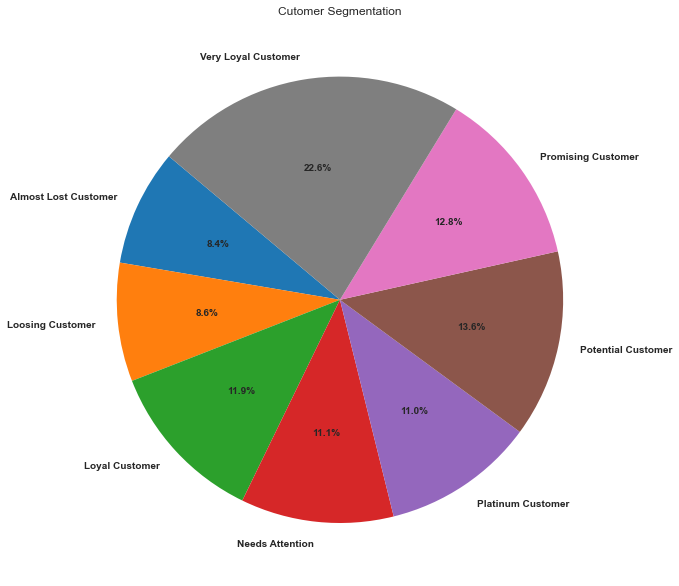

In [77]:
l = [295, 300, 415, 387, 386, 474, 447, 790]
    label_type = ['Almost Lost Customer','Loosing Customer','Loyal Customer','Needs Attention','Platinum Customer', 'Potential Customer', 'Promising Customer', 'Very Loyal Customer']
plt.title('Cutomer Segmentation')
plt.pie(l, labels = label_type, autopct='%1.1f%%', startangle=140)
plt.show()

In [70]:
rfm_min = rfm.groupby('Customer Level').agg({
            'Recency': 'min',
            'Frequency': 'min',
            'MonetaryValue': ['min', 'count']}).round(1)
rfm_min

Recency Frequency MonetaryValue      
                         min       min           min count
Customer Level                                            
Almost Lost Customer      87         1          15.1   295
Loosing Customer          46         1          35.7   300
Loyal Customer             1         3         938.5   415
Needs Attention           19         1          63.8   387
Platinum Customer          1         4        1890.6   386
Potential Customer         1         2         263.5   474
Promising Customer         1         1         168.4   447
Very Loyal Customer        1         5        1943.5   790